In [1]:
import pandas as pd

In [2]:
watch_history = pd.read_csv('cleaned_watch_history_mk.csv')
bank_transactions = pd.read_csv('Mock_Bank_Transactions_Database.csv')

In [3]:
watch_history['Timestamp'] = pd.to_datetime(watch_history['Timestamp'])
bank_transactions['Timestamp'] = pd.to_datetime(bank_transactions['Timestamp'])

In [4]:
watch_history['Date'] = watch_history['Timestamp'].dt.date
watch_history['Hour'] = watch_history['Timestamp'].dt.hour
watch_history['Weekday'] = watch_history['Timestamp'].dt.day_name()

bank_transactions['Date'] = bank_transactions['Timestamp'].dt.date
bank_transactions['Hour'] = bank_transactions['Timestamp'].dt.hour
bank_transactions['Weekday'] = bank_transactions['Timestamp'].dt.day_name()

In [5]:
watch_history.to_csv('cleaned_watch_history_updated.csv', index=False)
bank_transactions.to_csv('cleaned_bank_transactions_updated.csv', index=False)

In [6]:
print("Watch History Dataset Summary:")
print(watch_history.info())
print(watch_history.describe(include='all'))

print("\nBank Transactions Dataset Summary:")
print(bank_transactions.info())
print(bank_transactions.describe(include='all'))

Watch History Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Timestamp     203 non-null    datetime64[ns, UTC]
 1   Video Title   203 non-null    object             
 2   URL           203 non-null    object             
 3   Channel Name  198 non-null    object             
 4   Date          203 non-null    object             
 5   Time          203 non-null    object             
 6   Hour          203 non-null    int32              
 7   Weekday       203 non-null    object             
dtypes: datetime64[ns, UTC](1), int32(1), object(6)
memory usage: 12.0+ KB
None
                                  Timestamp  \
count                                   203   
unique                                  NaN   
top                                     NaN   
freq                                    NaN   


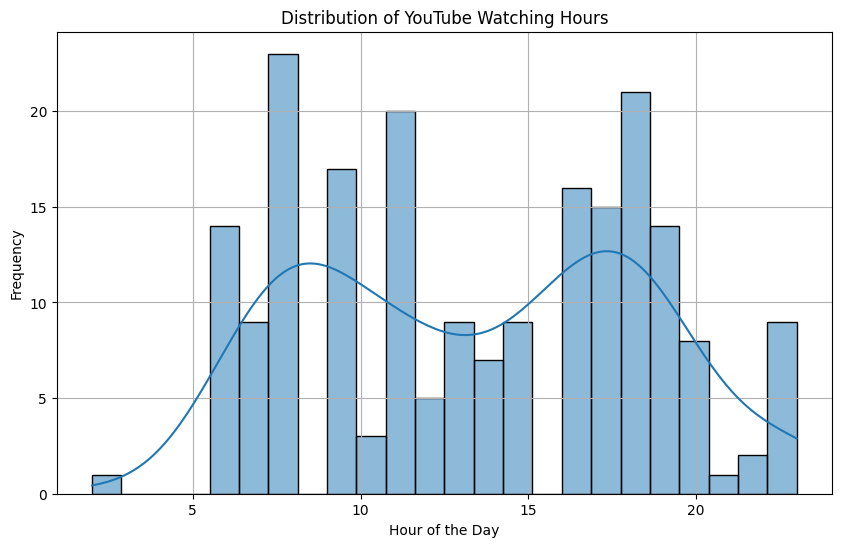

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module

# ... (your existing code) ...

plt.figure(figsize=(10, 6)) # Now 'plt' is defined and can be used
sns.histplot(watch_history['Hour'], bins=24, kde=True)
plt.title('Distribution of YouTube Watching Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

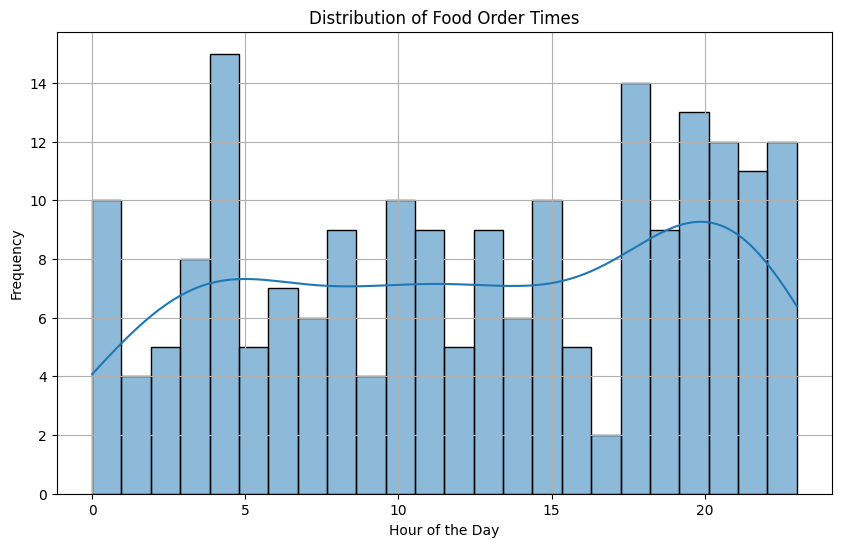

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(bank_transactions['Hour'], bins=24, kde=True)
plt.title('Distribution of Food Order Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [10]:
merged_data = pd.merge(watch_history, bank_transactions, on='Date', suffixes=('_watch', '_order'))

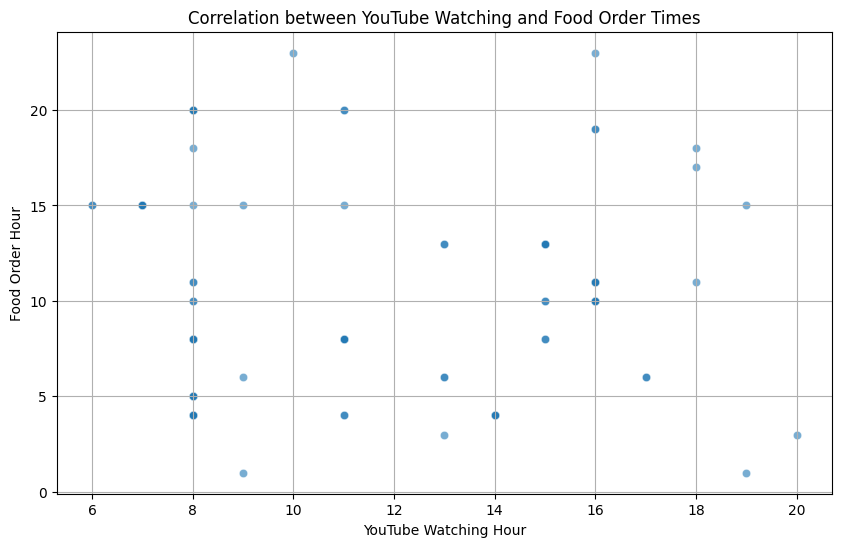

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Hour_watch', y='Hour_order', alpha=0.6)
plt.title('Correlation between YouTube Watching and Food Order Times')
plt.xlabel('YouTube Watching Hour')
plt.ylabel('Food Order Hour')
plt.grid(True)
plt.show()

In [12]:
correlation = merged_data[['Hour_watch', 'Hour_order']].corr()
print("\nCorrelation Matrix:")
print(correlation)


Correlation Matrix:
            Hour_watch  Hour_order
Hour_watch    1.000000   -0.043893
Hour_order   -0.043893    1.000000


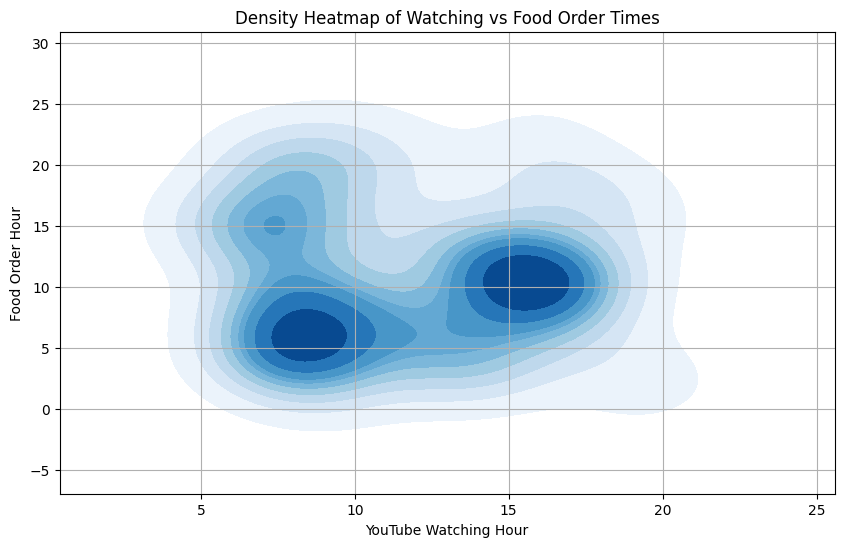

In [13]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=merged_data, x='Hour_watch', y='Hour_order', cmap='Blues', fill=True)
plt.title('Density Heatmap of Watching vs Food Order Times')
plt.xlabel('YouTube Watching Hour')
plt.ylabel('Food Order Hour')
plt.grid(True)
plt.show()

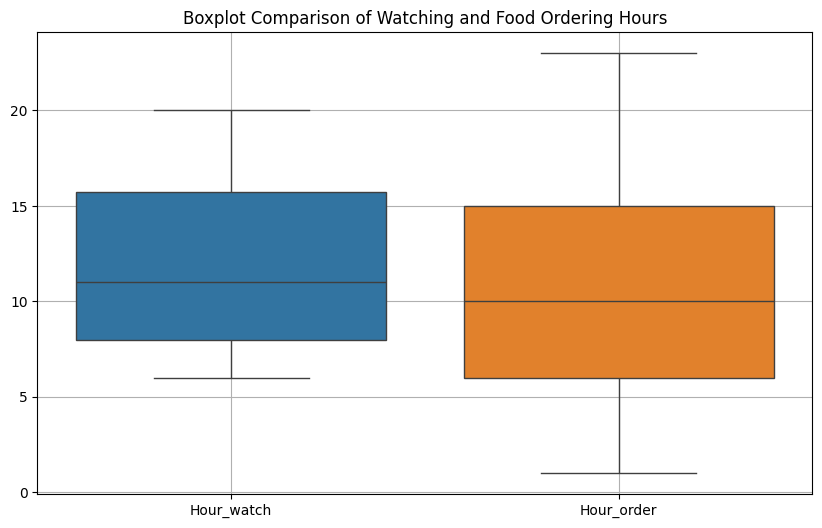

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data[['Hour_watch', 'Hour_order']])
plt.title('Boxplot Comparison of Watching and Food Ordering Hours')
plt.grid(True)
plt.show()

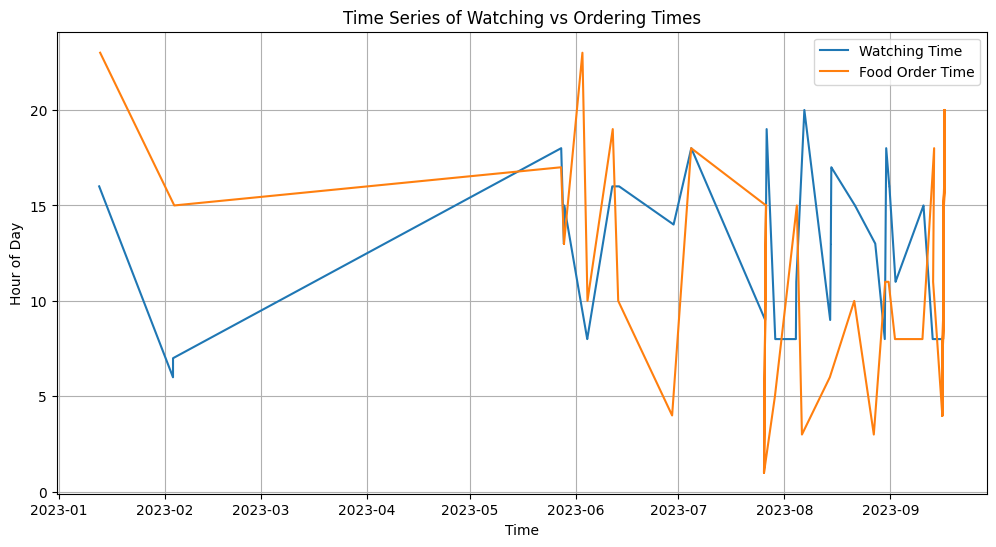

In [15]:
merged_data['Timestamp_watch'] = pd.to_datetime(merged_data['Timestamp_watch'])
merged_data['Timestamp_order'] = pd.to_datetime(merged_data['Timestamp_order'])
merged_data.sort_values(by='Timestamp_watch', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Timestamp_watch'], merged_data['Hour_watch'], label='Watching Time')
plt.plot(merged_data['Timestamp_order'], merged_data['Hour_order'], label='Food Order Time')
plt.title('Time Series of Watching vs Ordering Times')
plt.xlabel('Time')
plt.ylabel('Hour of Day')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
from scipy.stats import pearsonr
correlation_coef, p_value = pearsonr(merged_data['Hour_watch'], merged_data['Hour_order'])
print(f"Pearson Correlation Coefficient: {correlation_coef}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: -0.0438933351008637
P-value: 0.6882087124857948
